In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy import genfromtxt
EEG = genfromtxt("C:/Users/SoobinYim/workspace/Confusion during MOOC/EEG_data.csv", delimiter=",")

In [3]:
#removal = [2,3,4,5,6,7,8,9,10,11,12,13]
#X = np.delete(EEG, list(set(removal+[14])), axis=1)
EEG=EEG[1:,:]
X=EEG[:,5:-2]
y = EEG[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [16]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

ImportError: cannot import name 'CuDNN' from 'keras.layers' (C:\Users\SoobinYim\anaconda3\envs\env\lib\site-packages\keras\layers\__init__.py)

In [6]:
X_train = X_train.reshape(X_train.shape+ (1,))
X_test = X_test.reshape(X_test.shape + (1,))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8967, 8, 1)
(3844, 8, 1)
(8967,)
(3844,)


In [15]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape = (8,1), return_sequences = True))
    model.add(LSTM(1, return_sequences = False))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

model = lstm_model()

model.summary()

NameError: name 'CuDNNLSTM' is not defined

In [13]:
hist=model.fit(X_train, y_train, batch_size = 100, epochs = 10, verbose = 0, validation_data=(X_test,y_test))

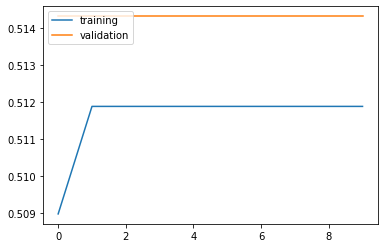

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

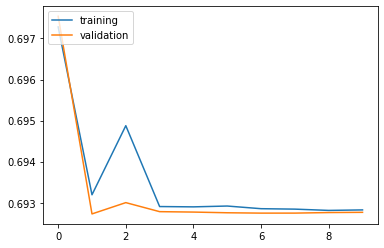

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [11]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3844/3844 [==============================] - 0s 108us/step
Test accuracy:  0.5143080353736877
